In [1]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
import pandas as pd 
import numpy as np 
%matplotlib inline 

In [2]:
X,y = make_blobs(n_samples= 1000 , centers=3,n_features=2)

In [3]:
X

array([[-3.15449849, -3.09720457],
       [-4.38842183, -0.99799575],
       [-3.58648376,  0.94354019],
       ...,
       [-2.11467877, -2.1296196 ],
       [ 6.91794493,  1.59424947],
       [ 5.49930106,  1.41579668]], shape=(1000, 2))

In [4]:
y

array([0, 0, 2, 1, 2, 0, 2, 0, 1, 1, 2, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1, 1,
       2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 2, 0, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 1, 2, 0, 1, 2, 0, 2,
       1, 0, 0, 1, 0, 2, 1, 0, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 1, 1, 2, 2,
       0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 0, 1,
       0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 0, 2, 1, 2, 0, 2, 2, 1, 2, 2, 1, 2,
       1, 1, 0, 2, 2, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 1, 2, 1, 1, 1, 0,
       1, 2, 0, 0, 0, 0, 2, 1, 2, 1, 1, 2, 2, 0, 0, 2, 2, 2, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 1, 0, 2,
       2, 2, 1, 1, 0, 1, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 0, 2, 2, 2,
       0, 1, 0, 2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2, 1,
       2, 1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 0,
       2, 0, 1, 1, 2, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2,

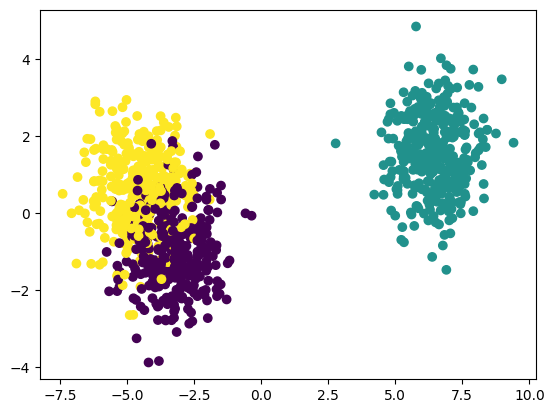

In [6]:
plt.scatter(X[: , 0],X[: ,1] ,c = y)

In [7]:
##Standardization 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.33 ,random_state=  42)

In [9]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
from sklearn.cluster import KMeans 

In [11]:
## Elbow method 
wcss = [] 
for k in range(1,11) :
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled,X_test_scaled)
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[1340.0,
 488.94337470258745,
 246.0813147320967,
 177.98802974790735,
 123.50227269855277,
 109.32871174908101,
 87.38734315740219,
 72.96995231964232,
 65.29405783163992,
 61.072743454369146]

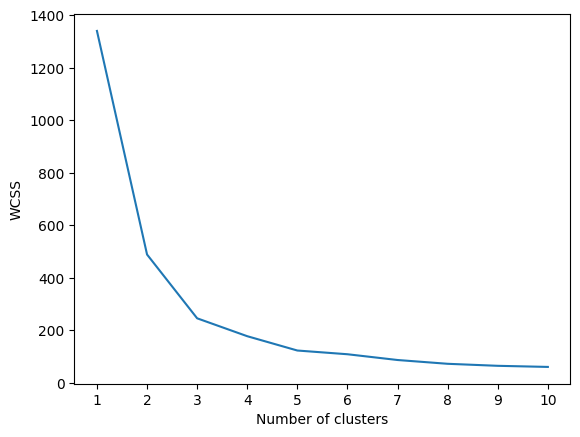

In [13]:
plt.plot(range(1,11) , wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [14]:
kmeans = KMeans(n_clusters= 3 , init = "k-means++")

In [15]:
kmeans.fit_predict(X_train)

array([2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 0, 1, 1, 0, 2,
       0, 1, 2, 1, 2, 2, 2, 1, 0, 1, 2, 0, 0, 2, 0, 2, 2, 1, 0, 0, 1, 1,
       2, 1, 1, 0, 2, 2, 0, 0, 1, 2, 2, 2, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1,
       0, 2, 0, 0, 1, 2, 2, 2, 1, 2, 1, 1, 1, 0, 1, 2, 1, 2, 0, 1, 2, 2,
       2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1,
       2, 1, 1, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 0, 1, 1,
       2, 2, 1, 0, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 1, 0, 2, 2, 1, 0, 1, 1,
       2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 0, 2, 2, 1, 0, 0, 2, 1, 2, 0, 1,
       2, 2, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0, 0, 1,
       1, 2, 0, 0, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 0, 1, 2,
       0, 1, 2, 0, 0, 2, 1, 2, 0, 0, 2, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1, 0,
       0, 1, 2, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 1, 1, 0,
       1, 2, 0, 1, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1,

In [16]:
y_pred = kmeans.predict(X_test_scaled)

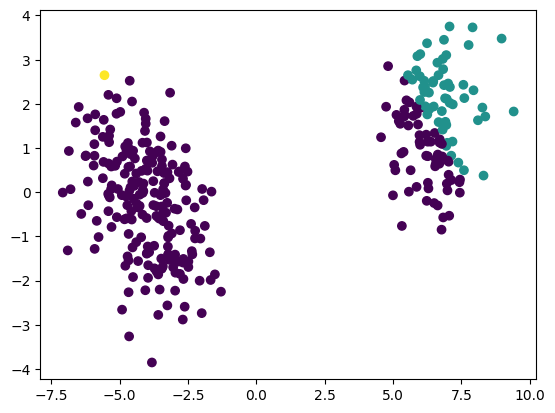

In [17]:
plt.scatter(X_test[:,0] , X_test[:,1] , c = y_pred)

In [21]:
### For finding K VALUE 

In [18]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [19]:
from kneed import KneeLocator

kl= KneeLocator(range(1,11) ,wcss , curve = "convex" , direction="decreasing")

In [20]:
kl.elbow

np.int64(3)

In [22]:
## Silhoutte score

from sklearn.metrics import silhouette_score


In [23]:
silhouette_coefficients =  []
for k in range(2,11) :
    kmeans = KMeans(n_clusters=k,init = "k-means++")
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)


In [24]:
silhouette_coefficients

[np.float64(0.610285256980832),
 np.float64(0.5606352515993552),
 np.float64(0.5216099948875319),
 np.float64(0.46648674308370636),
 np.float64(0.45231827442520695),
 np.float64(0.4284179452794439),
 np.float64(0.4099550763468328),
 np.float64(0.3780180789707798),
 np.float64(0.3744398213056086)]

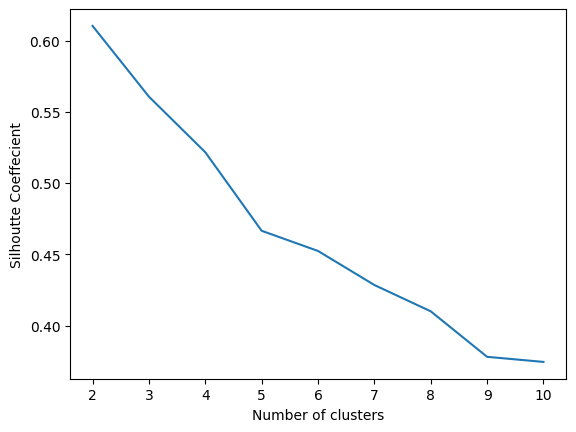

In [26]:
plt.plot(range(2,11) , silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()